In [37]:
import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8-whitegrid')

plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',titleweight='bold', titlesize=18, titlepad=10)

In [38]:
import pandas as pd
red_wine = pd.read_csv('red-wine.csv')

In [39]:
df_train = red_wine.sample(frac=0.7,random_state=0)
df_valid = red_wine.drop(df_train.index)

In [40]:
x_train = df_train.drop('quality',axis=1)
x_valid = df_valid.drop('quality',axis=1)
y_train = df_train['quality']
y_valid = df_valid['quality']

In [41]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(1024,activation='relu',input_shape=[11]),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1024, activation='relu'),
    layers.Dropout(0.3),
    layers.BatchNormalization(),
    layers.Dense(1),
])

c:\Users\Raktim\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:95: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [42]:
model.compile(
    optimizer='adam',
    loss='mae',
)

In [43]:
history = model.fit(
    x_train,y_train,
    validation_data=(x_valid,y_valid),
    batch_size=256,
    epochs=100,
    verbose=0
)

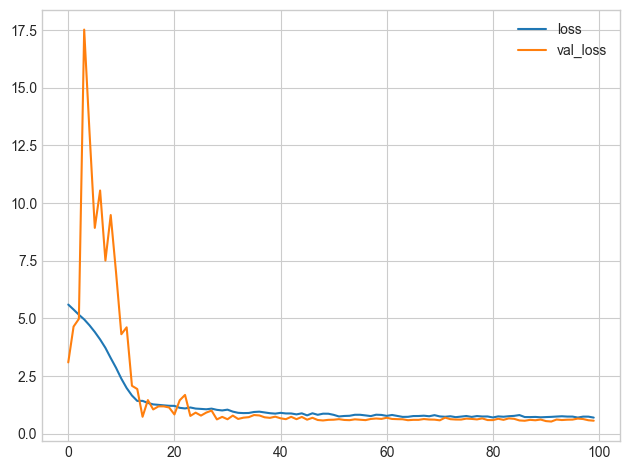

In [44]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot();